# EDA

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
# импортируем данные
df = pd.read_csv(r"C:\Users\allek\OneDrive\Рабочий стол\summer_train\git_project\Diabetes-ML-From-Scratch\data\raw\diabetes.csv")

### Ознакомление с данными

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Анализ целевой переменной

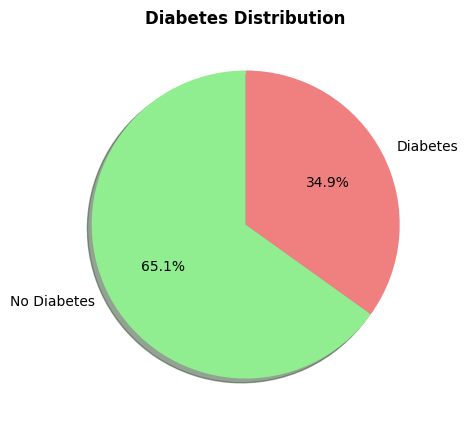

In [6]:
plt.figure(figsize=(5, 5))
plt.pie(df['Outcome'].value_counts(), 
        labels=['No Diabetes', 'Diabetes'],
        colors=['lightgreen', 'lightcoral'],  # насыщенные зеленый и красный
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
plt.title('Diabetes Distribution', fontweight='bold')
plt.show()


### Анализ пропущенных значений

In [7]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[zero_columns] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### Анализ распределений числовых признаков

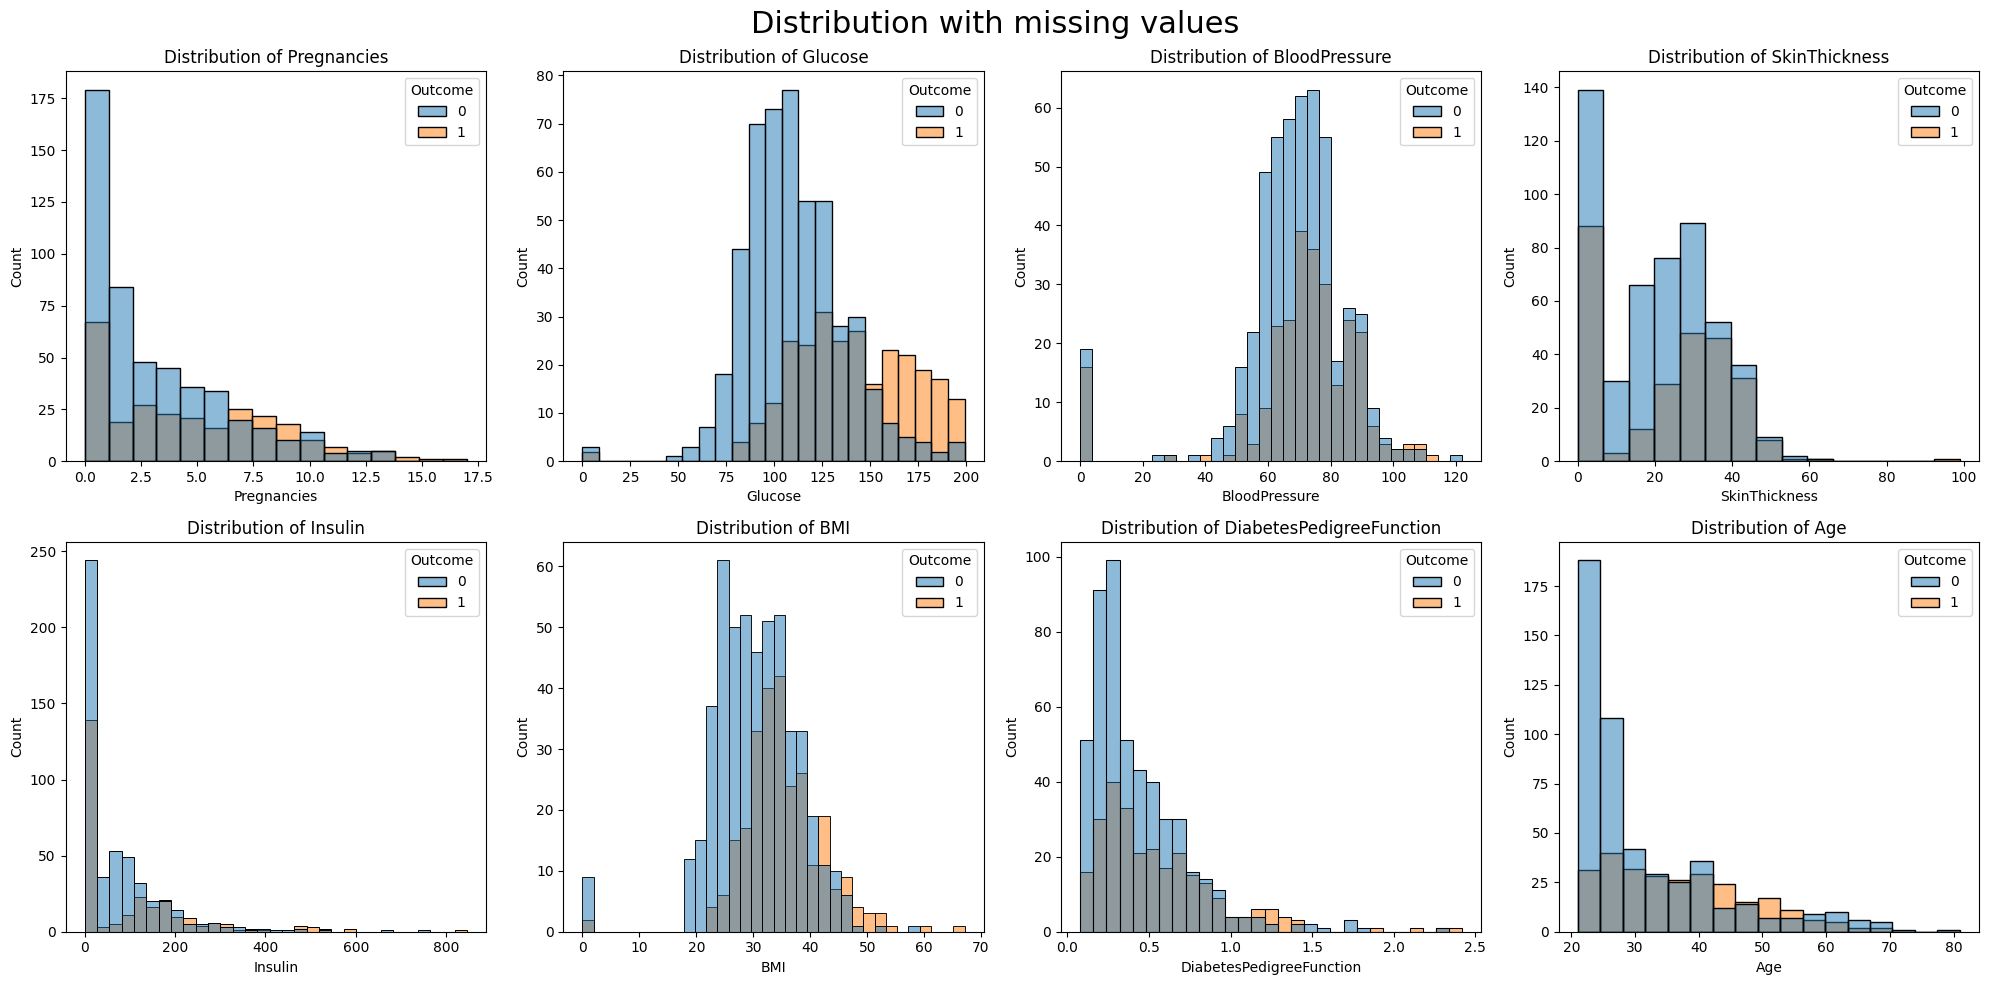

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for idx, col in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=col, hue='Outcome', ax=axes[idx//4, idx%4])
    axes[idx//4, idx%4].set_title(f'Distribution of {col}')

fig.suptitle(f'Distribution with missing values', fontsize=22)

plt.tight_layout()
plt.show()

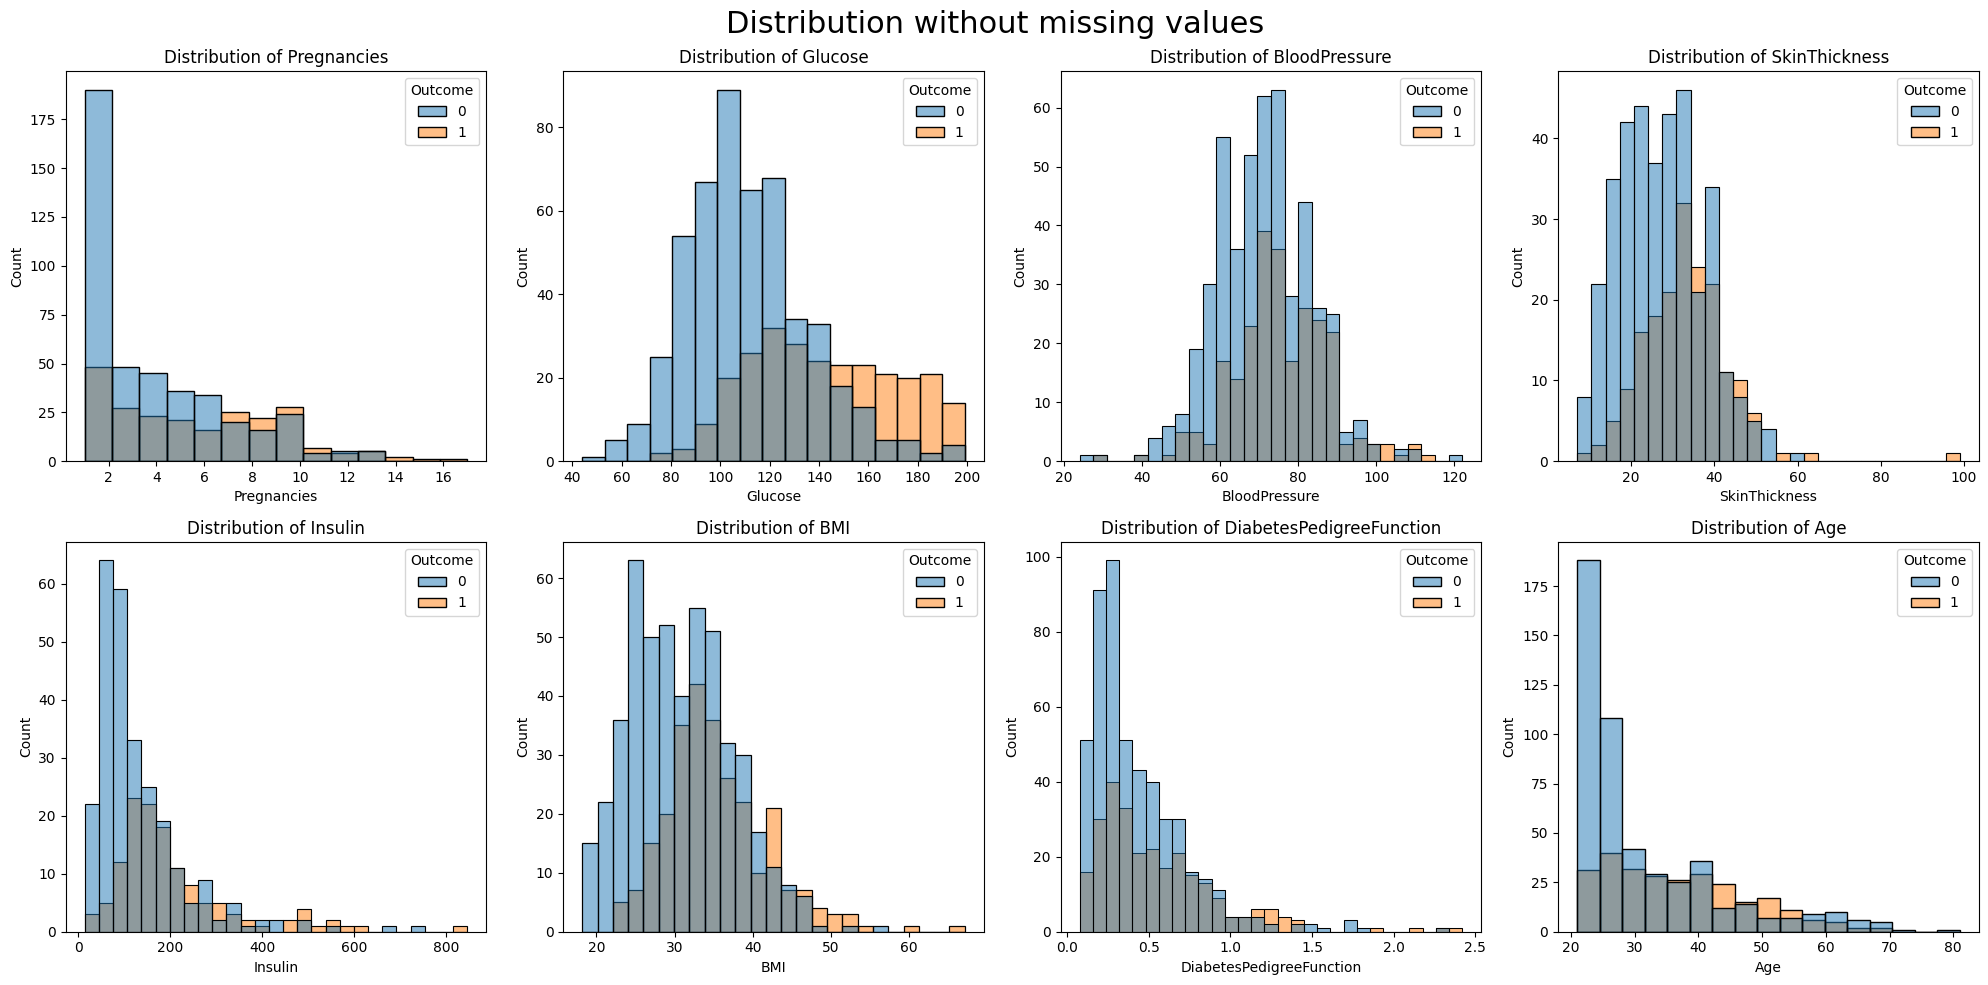

In [9]:
clean_data = [[column, []] for column in df.columns]
for ind, column in enumerate(df.columns[:-1]):
    clean_data[ind][1] = [(x, df["Outcome"][i]) for i, x in enumerate(df[column]) if x!=0]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for idx, (col, data) in enumerate(clean_data[:-1]):
    if data:
        temp_df = pd.DataFrame(data, columns=[col, 'Outcome'])
        
        sns.histplot(data=temp_df, x=col, hue='Outcome', ax=axes[idx//4, idx%4])
        axes[idx//4, idx%4].set_title(f'Distribution of {col}')

fig.suptitle(f'Distribution without missing values', fontsize=22);

plt.tight_layout()
plt.show()

## Анализ выбросов

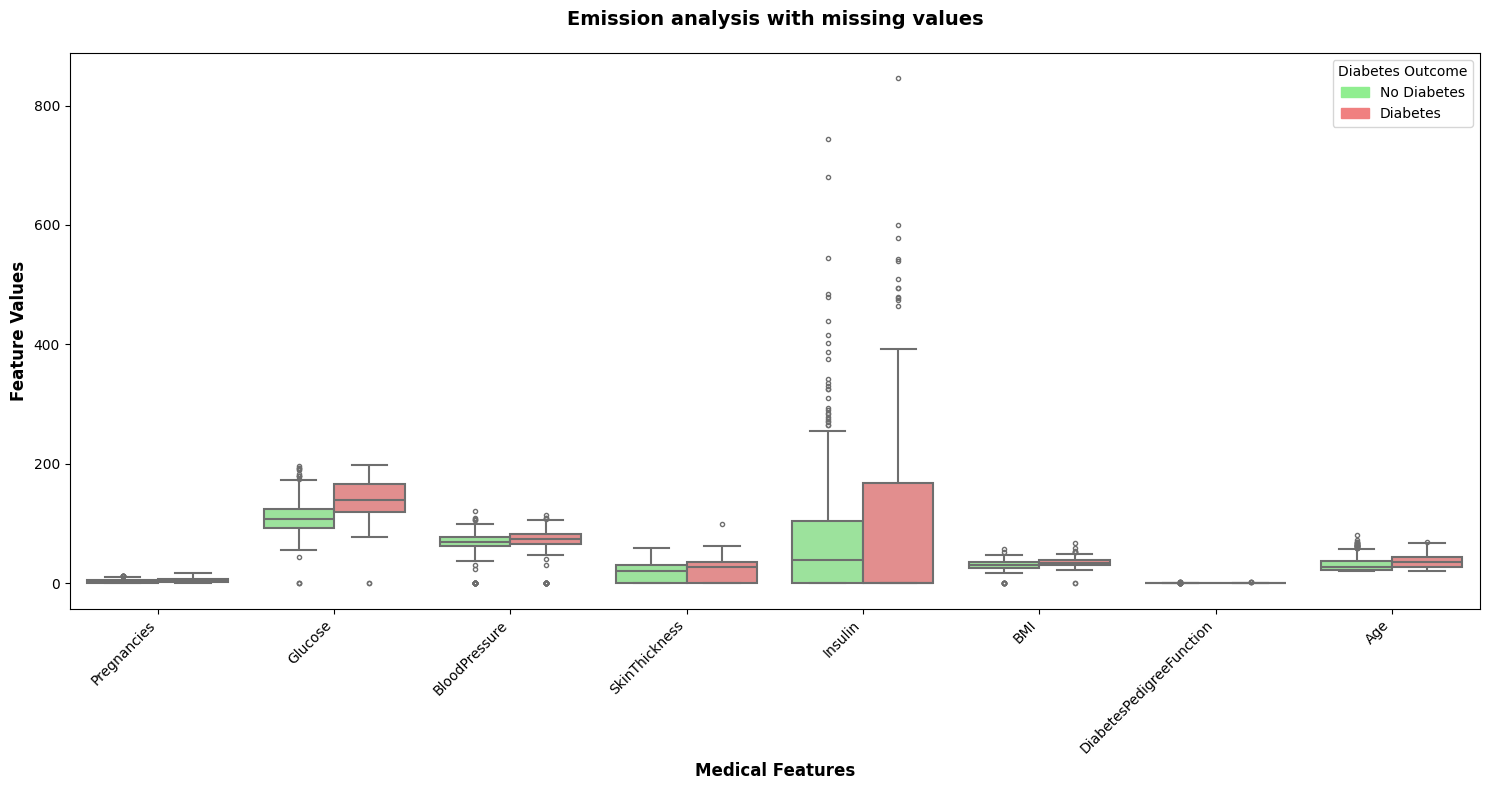

In [10]:
# Вертикальная компоновка для сравнения распределений
plt.figure(figsize=(15, 8))

# Создаем "расплавленный" DataFrame для seaborn
melted_df = pd.melt(df, id_vars=['Outcome'], 
                    value_vars=df.columns,
                    var_name='Feature', value_name='Value')

# Создаем группированные боксплоты
ax = sns.boxplot(data=melted_df, x='Feature', y='Value', hue='Outcome',
                 palette={0: 'lightgreen', 1: 'lightcoral'}, 
                 linewidth=1.5, fliersize=3)

plt.title('Emission analysis with missing values', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Medical Features', fontsize=12, fontweight='bold')
plt.ylabel('Feature Values', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Создаем кастомные элементы для легенды
custom_colors = ['lightgreen', 'lightcoral']  # Ваши цвета
legend_labels = ['No Diabetes', 'Diabetes']

# Создаем патчи для легенды
handles = [mpatches.Patch(color=color, label=label) 
           for color, label in zip(custom_colors, legend_labels)]

# Добавляем легенду
plt.legend(handles=handles, title='Diabetes Outcome',
           loc='upper right')

plt.tight_layout()
plt.show()

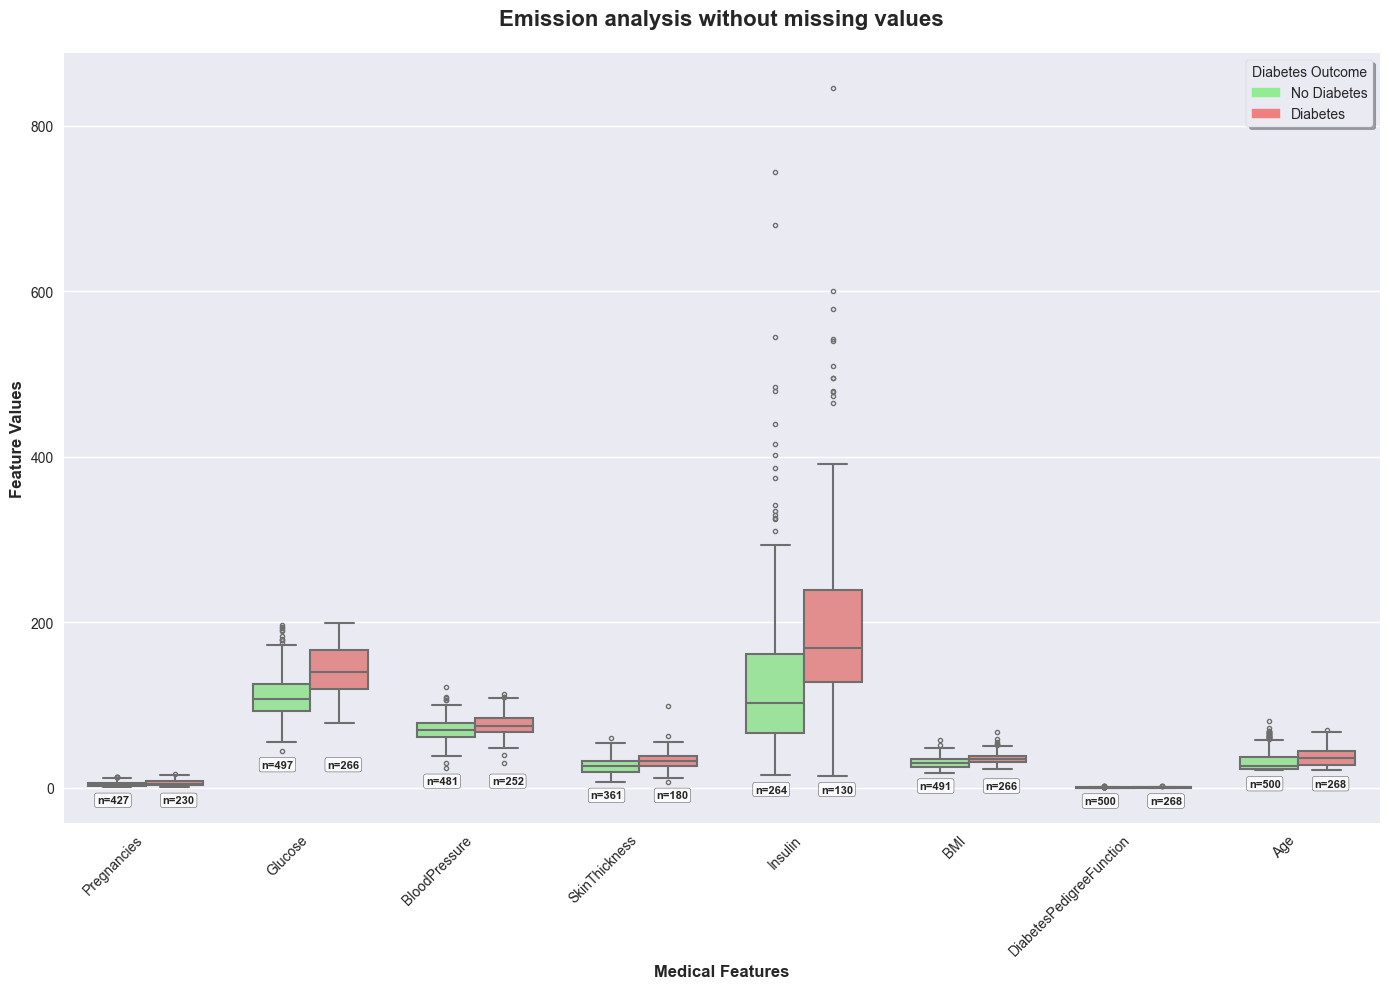

In [11]:
# Создаем DataFrame из clean_data
clean_df_list = []
for column, values in clean_data:
    if column != 'Outcome':  # Пропускаем целевую переменную
        for value, outcome in values:
            clean_df_list.append({'Feature': column, 'Value': value, 'Outcome': outcome})

clean_df = pd.DataFrame(clean_df_list)

# Настройка стиля
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# Создаем фигуру
plt.figure(figsize=(14, 10))

# Вертикальные боксплоты для всех признаков
ax = sns.boxplot(data=clean_df, x='Feature', y='Value', hue='Outcome',
                 palette={0: 'lightgreen', 1: 'lightcoral'},
                 linewidth=1.5, fliersize=3, width=0.7)

plt.title('Emission analysis without missing values', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Medical Features', fontsize=12, fontweight='bold')
plt.ylabel('Feature Values', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Добавляем количество наблюдений на график
outcome_names = {0: 'No Diabetes', 1: 'Diabetes'}
for i, feature in enumerate(clean_df['Feature'].unique()):
    for j, outcome in enumerate([0, 1]):
        count = len([x for x in clean_data if x[0] == feature][0][1]) if j == 0 else \
                len([x for x in clean_data if x[0] == feature][0][1])
        # Берем только значения для конкретного outcome
        feature_outcome_data = [val for val, out in [x for x in clean_data if x[0] == feature][0][1] if out == outcome]
        count = len(feature_outcome_data)
        
        if count > 0:
            ax.text(i + (-0.2 if outcome == 0 else 0.2), 
                   clean_df[clean_df['Feature'] == feature]['Value'].min() - 10,
                   f'n={count}', 
                   ha='center', va='top', fontsize=8, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))

# Создаем кастомные элементы для легенды
custom_colors = ['lightgreen', 'lightcoral']  # Ваши цвета
legend_labels = ['No Diabetes', 'Diabetes']

# Создаем патчи для легенды
handles = [mpatches.Patch(color=color, label=label) 
           for color, label in zip(custom_colors, legend_labels)]

plt.legend(handles=handles, title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'],
           loc='upper right', frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

### Корреляционный анализ

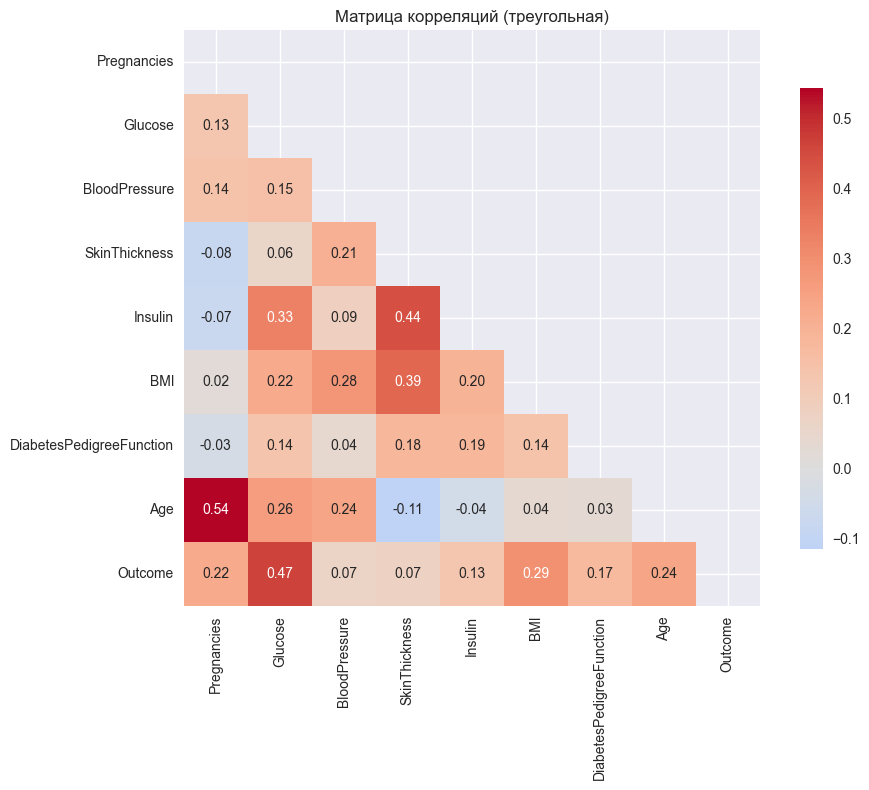

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

# Маска для скрытия верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Матрица корреляций (треугольная)')
plt.tight_layout()
plt.show()

### Парные отношения

In [13]:
df_temp = df[(df['Insulin']!=0) & (df['Glucose']!=0) & (df['BMI']!=0)  & (df['Age']!=0)]

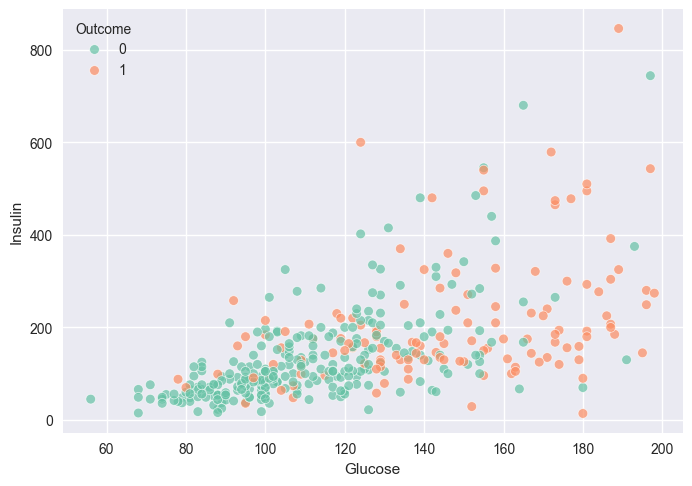

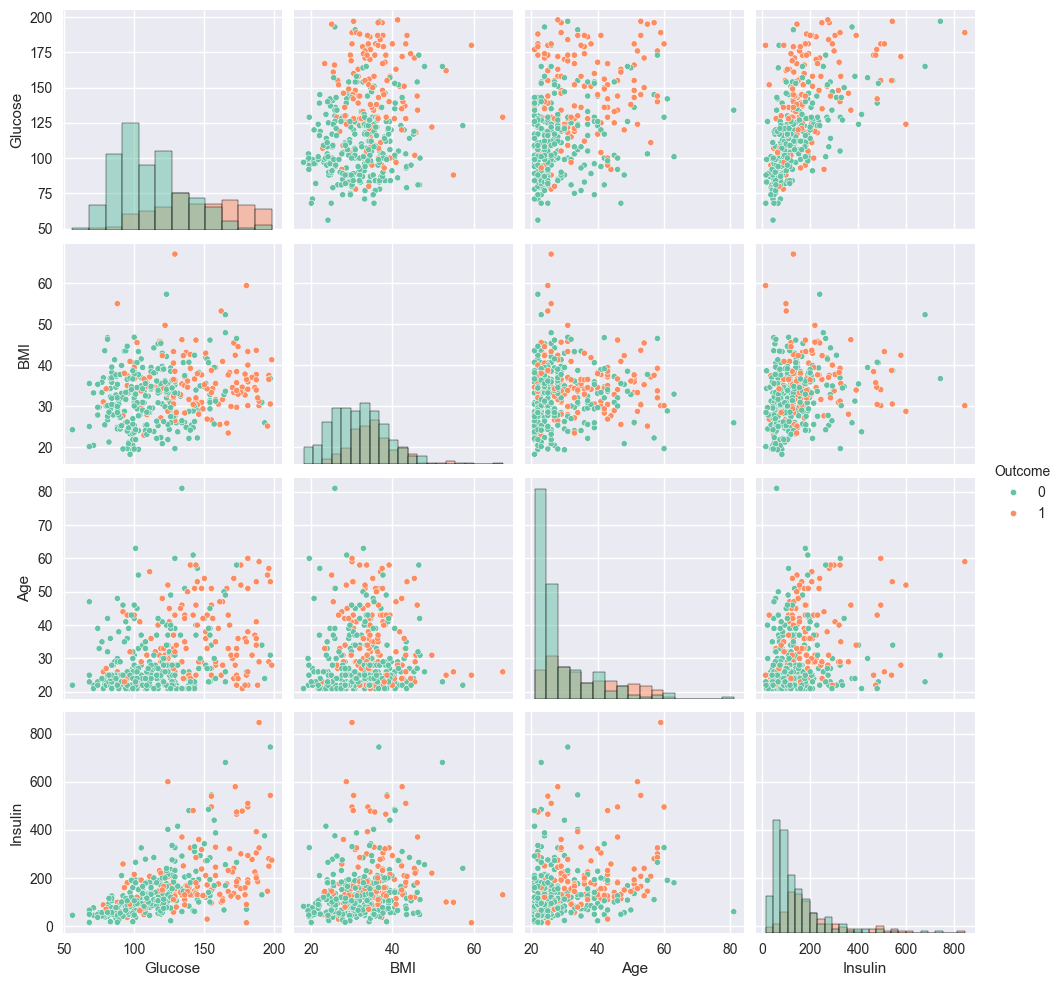

In [14]:
# Scatter plot с цветом по классам:
sns.scatterplot(data=df_temp, x='Glucose', y='Insulin', hue='Outcome', alpha=0.7)

# Pairplot для ключевых признаков:
key_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']
sns.pairplot(df_temp[key_features], 
             hue='Outcome', 
             diag_kind='hist',
             plot_kws={'s': 20}); 

## Выводы

1. Наблюдается дисбаланс классов (65% negative / 35% positive) -> будут использоваться метрики F1-score, ROC-AUC
2. Большое количество незаполненных значений -> пропуски будут заполнены медианой
3. Имеется достаточно большое количество выбросов -> будет применён capping, так как данные врачебные и экстремальные значения могут быть реальными
4. Glucose, BMI, Age влияют на целевую переменную в большей мере
5. При высоком показателе глюкозы и малом показателе инсулина преобладает  метка positive -> feature engineering